#Capstone Klasifikasi Obesitas00
---
Nama : Daniel Nomolas Wicaksono

NIM : A11.2022.14448
---


Pendahuluan
Notebook ini berisikan proses pembuatan model klasifikasi obesitas dari proses awal yaitu pemahaman data (EDA), Preprocessing dan pemodelan. Dataset yang dipakai adalah ObesityDataSet.csv yang memiliki fitur seperti umur, alat kelamin, tinggi dan berat badan. Model yang digunakan adalah Random Forest,Gradient Boosting dan XGB.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ObesityDataSet.csv')
df.copy = pd.read_csv('ObesityDataSet.csv')

Informasi dataset:

Dataset ini memuat informasi yang digunakan untuk memperkirakan tingkat obesitas pada
individu dari tiga negara, yakni Meksiko, Peru, dan Kolombia. Estimasi dilakukan
berdasarkan kebiasaan makan dan kondisi fisik responden. Terdapat 17 atribut dan 2111
entri data dalam dataset ini, dengan variabel target yang disebut NObeyesdad atau Obesity
Level. Variabel ini diklasifikasikan ke dalam tujuh kategori, yaitu: Berat Badan Kurang
(Insufficient Weight), Berat Badan Normal (Normal Weight), Kelebihan Berat Badan
Tingkat I (Overweight Level I), Kelebihan Berat Badan Tingkat II (Overweight Level II),
Obesitas Tipe I (Obesity Type I), Obesitas Tipe II (Obesity Type II), dan Obesitas Tipe III
(Obesity Type III).

Sebagian besar data, yaitu sekitar 77%, dihasilkan secara sintetis menggunakan perangkat
lunak Weka dengan bantuan metode SMOTE (Synthetic Minority Over-sampling
Technique), sementara 23% sisanya diperoleh secara langsung dari pengguna melalui platform web.

# EDA
---

Check beberapa baris pertama dan informasi umum dataset seperti jumlah
baris, kolom, deskripsi data dan tipe data.

In [3]:
df.head()


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.shape

(2111, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

In [6]:
df.describe()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


In [7]:
df.isnull().sum()

,0
Age,14
Gender,9
Height,12
Weight,11
CALC,5
FAVC,11
FCVC,8
NCP,12
SCC,10
SMOKE,5


2. Cek keberadaan missing values, unique value, data duplikat, keseimbangan
data, dan deteksi outlier menggunakan boxplot.

In [8]:
print("\n>> Jumlah Missing Values berupa nan:")
print(df.isnull().sum())
print("\n>> Jumlah Missing Values berupa (?) :")
print((df=='?').sum())

print("\n>> Jumlah Unique Values per Kolom:")
print(df.nunique())

print("\n>> Jumlah Data Duplikat:")
print(df.duplicated().sum())


>> Jumlah Missing Values berupa nan:
Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64

>> Jumlah Missing Values berupa (?) :
Age                                8
Gender                            13
Height                            10
Weight                             8
CALC                              15
FAVC                              11
FCVC                              10
NCP                   

#Distribusi kelas target


>> Distribusi Kelas (NObeyesdad):
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


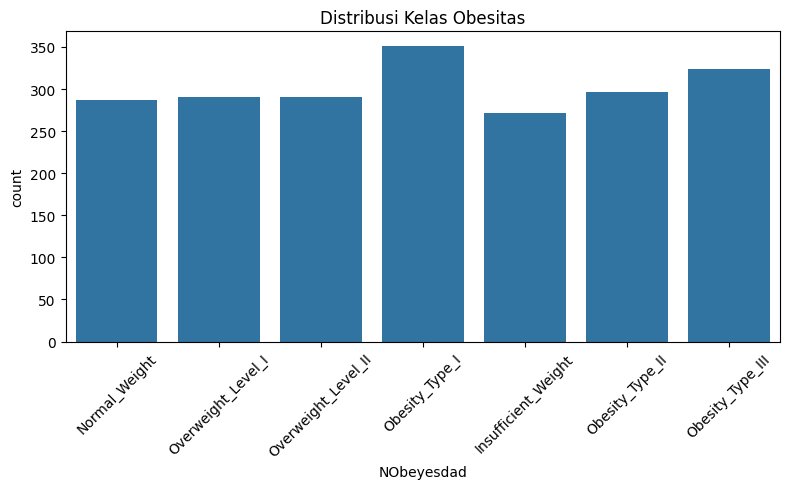

In [9]:

print("\n>> Distribusi Kelas (NObeyesdad):")
print(df['NObeyesdad'].value_counts())

plt.figure(figsize=(8, 5))
sns.countplot(x='NObeyesdad', data=df)
plt.title('Distribusi Kelas Obesitas')
plt.xticks(rotation=45)
plt.tight_layout()

#Cek outliers

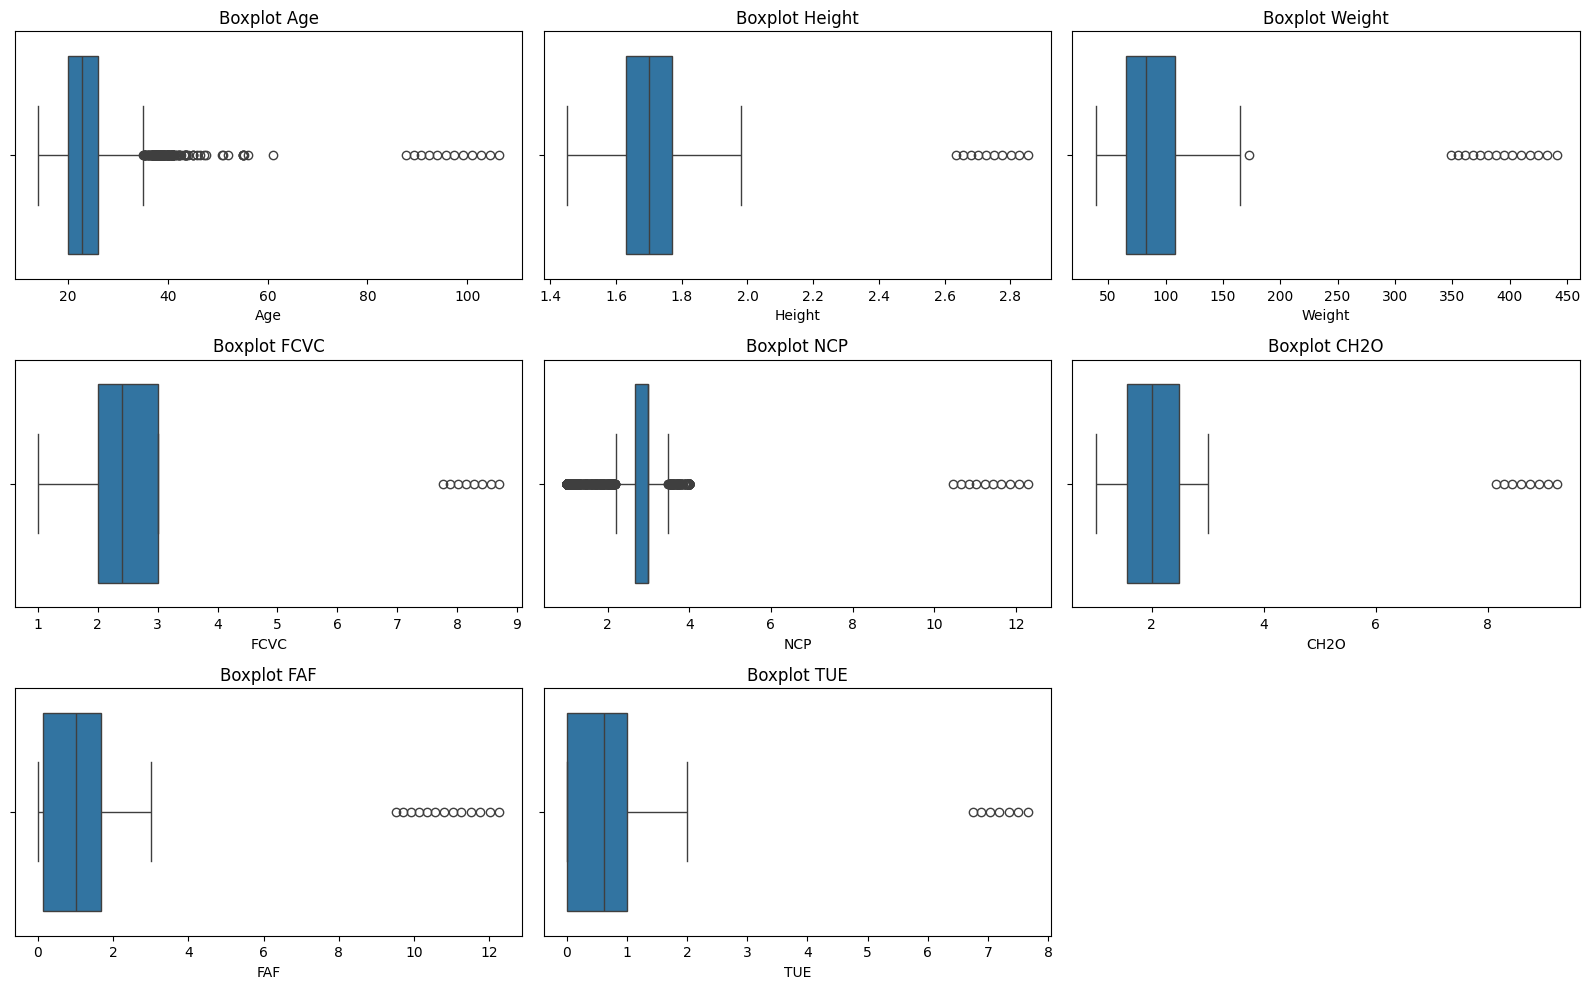

In [10]:
#Pisahkan coloms categoric dan numeric

numeric_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
cat_cols = ['Gender','CALC','FAVC','SCC','SMOKE','family_history_with_overweight','CAEC','MTRANS']

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

# Korelasi Antar Fitur Numerik

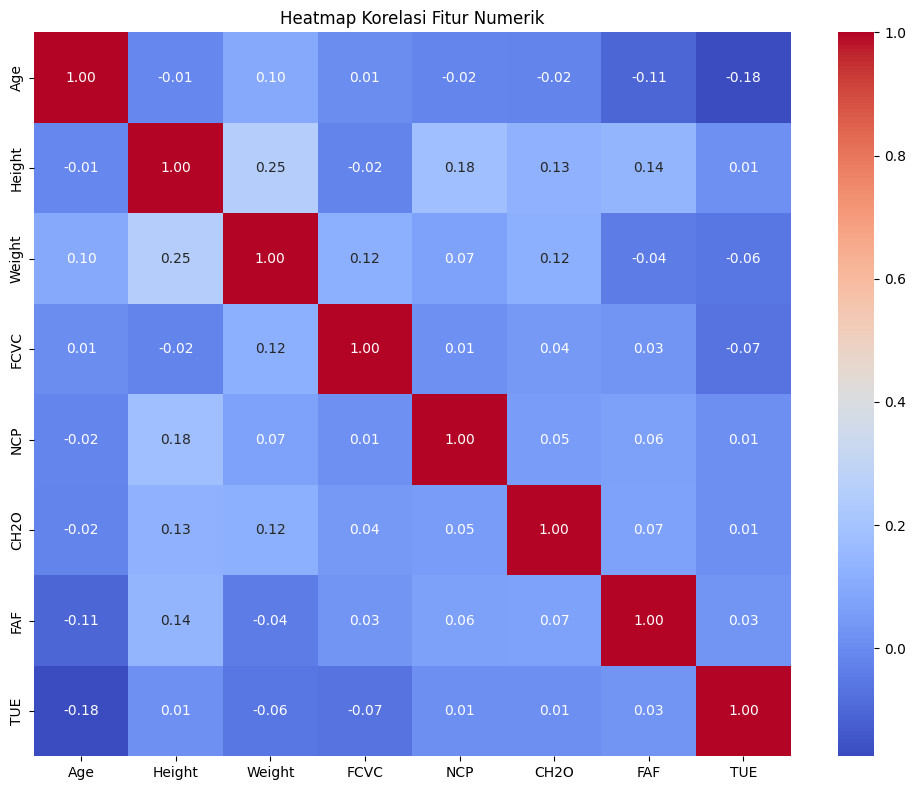

In [11]:

plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Fitur Numerik")
plt.tight_layout()
plt.show()

#Kesimpulan Sementara
---

1.Dataset belum siap dianalisis secara statistik karena kolom numerik masih bertipe object.

2.Harus dilakukan konversi tipe data, imputasi missing value, dan penanganan outlier sebelum modeling.

3.Distribusi target (NObeyesdad) tidak seimbang, yang perlu diperhatikan saat pemodelan.

#Preprocessing Data
---

Import library untuk preprocessing data

1.Label Encoder berfungsi untuk Encode kolom

2.Standard scaler untuk normalisasi

3.Smote untuk mengatasi imbalance

4.Seaborn untuk tampilan

5.Matplotlib untuk tampilan

In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt


Mengatasi Missing Value

In [13]:
# ===== 1. Tangani Missing Values & Error ('?') =====
df.replace('?', np.nan, inplace=True)  # ganti '?' jadi NaN

# Konversi kolom numerik ke float
num_cols = numeric_columns
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Imputasi kolom numerik dengan Mean
imputer_num = SimpleImputer(strategy='mean')
df[num_cols] = imputer_num.fit_transform(df[num_cols])

# Imputasi kolom kategori dengan Modus
cat_cols = df.select_dtypes(include='object').columns.drop('NObeyesdad')
imputer_cat = SimpleImputer(strategy='most_frequent')
df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])


In [14]:
df.isnull().sum()

,0
Age,0
Gender,0
Height,0
Weight,0
CALC,0
FAVC,0
FCVC,0
NCP,0
SCC,0
SMOKE,0


In [15]:
(df=='?').sum()

,0
Age,0
Gender,0
Height,0
Weight,0
CALC,0
FAVC,0
FCVC,0
NCP,0
SCC,0
SMOKE,0


Penanganan Missing Values dan Nilai Error ('?')
---
Langkah awal dalam proses pra-pemrosesan data adalah menangani nilai-nilai yang hilang (missing values) dan kesalahan input data. Dalam dataset ini, terdapat beberapa nilai error yang ditandai dengan karakter '?', serta nilai hilang (NaN) pada sejumlah kolom.

Langkah-langkah yang dilakukan:
---
1.Mengganti nilai '?' dengan NaN:

Beberapa data kategori masih menggunakan tanda '?' untuk menandai nilai tidak valid atau hilang. Nilai ini diseragamkan menjadi NaN agar dapat diproses dengan metode imputasi dari pustaka scikit-learn.

2.Mengonversi kolom numerik ke tipe float:

Untuk memastikan proses imputasi berjalan lancar, kolom numerik yang mengandung karakter '?' diubah ke tipe float. Nilai yang gagal dikonversi otomatis diubah menjadi NaN.

3.Imputasi kolom numerik menggunakan Mean:

Setelah semua nilai '?' dikonversi ke NaN, kolom numerik diisi menggunakan nilai rata-rata (mean) dari masing-masing kolom. Strategi ini umum digunakan saat distribusi data mendekati normal.

4.Imputasi kolom kategori menggunakan Modus:

Untuk kolom bertipe kategori (objek/string), nilai NaN digantikan dengan nilai yang paling sering muncul (modus) pada kolom tersebut. Kolom target NObeyesdad dikecualikan dari proses ini karena akan digunakan sebagai label prediksi.

✅ Hasil Akhir:

Semua nilai '?' telah diubah menjadi NaN.

Tidak ada lagi missing values pada kolom numerik maupun kategori.

Dataset siap untuk tahap preprocessing selanjutnya (encoding, normalisasi, dll).

---
Menangani duplicates

---

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
# ===== 3. Tangani Outlier dengan IQR =====
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

for col in num_cols:
    df = remove_outliers(df, col)



Penanganan Outlier Menggunakan Metode IQR

 ---

Outlier adalah nilai yang secara signifikan berbeda dari mayoritas data lainnya. Nilai-nilai ekstrem ini dapat memengaruhi analisis statistik dan performa model prediktif, sehingga perlu diidentifikasi dan ditangani.

📌 Langkah-langkah yang dilakukan:

1.Menggunakan Metode IQR (Interquartile Range):

Metode IQR digunakan untuk mendeteksi outlier dalam data numerik. Rumusnya:

Q1 = Kuartil pertama (persentil ke-25)

Q3 = Kuartil ketiga (persentil ke-75)

IQR = Q3 - Q1

Batas bawah = Q1 - 1.5 * IQR

Batas atas = Q3 + 1.5 * IQR

2.Menghapus baris dengan nilai di luar batas IQR:

Untuk setiap kolom numerik, data yang berada di bawah batas bawah atau di atas batas atas dianggap sebagai outlier dan dihapus dari dataset.

3.Penerapan pada semua kolom numerik:

Fungsi remove_outliers() diterapkan secara iteratif pada seluruh kolom numerik (num_cols) agar dataset bersih dari outlier.

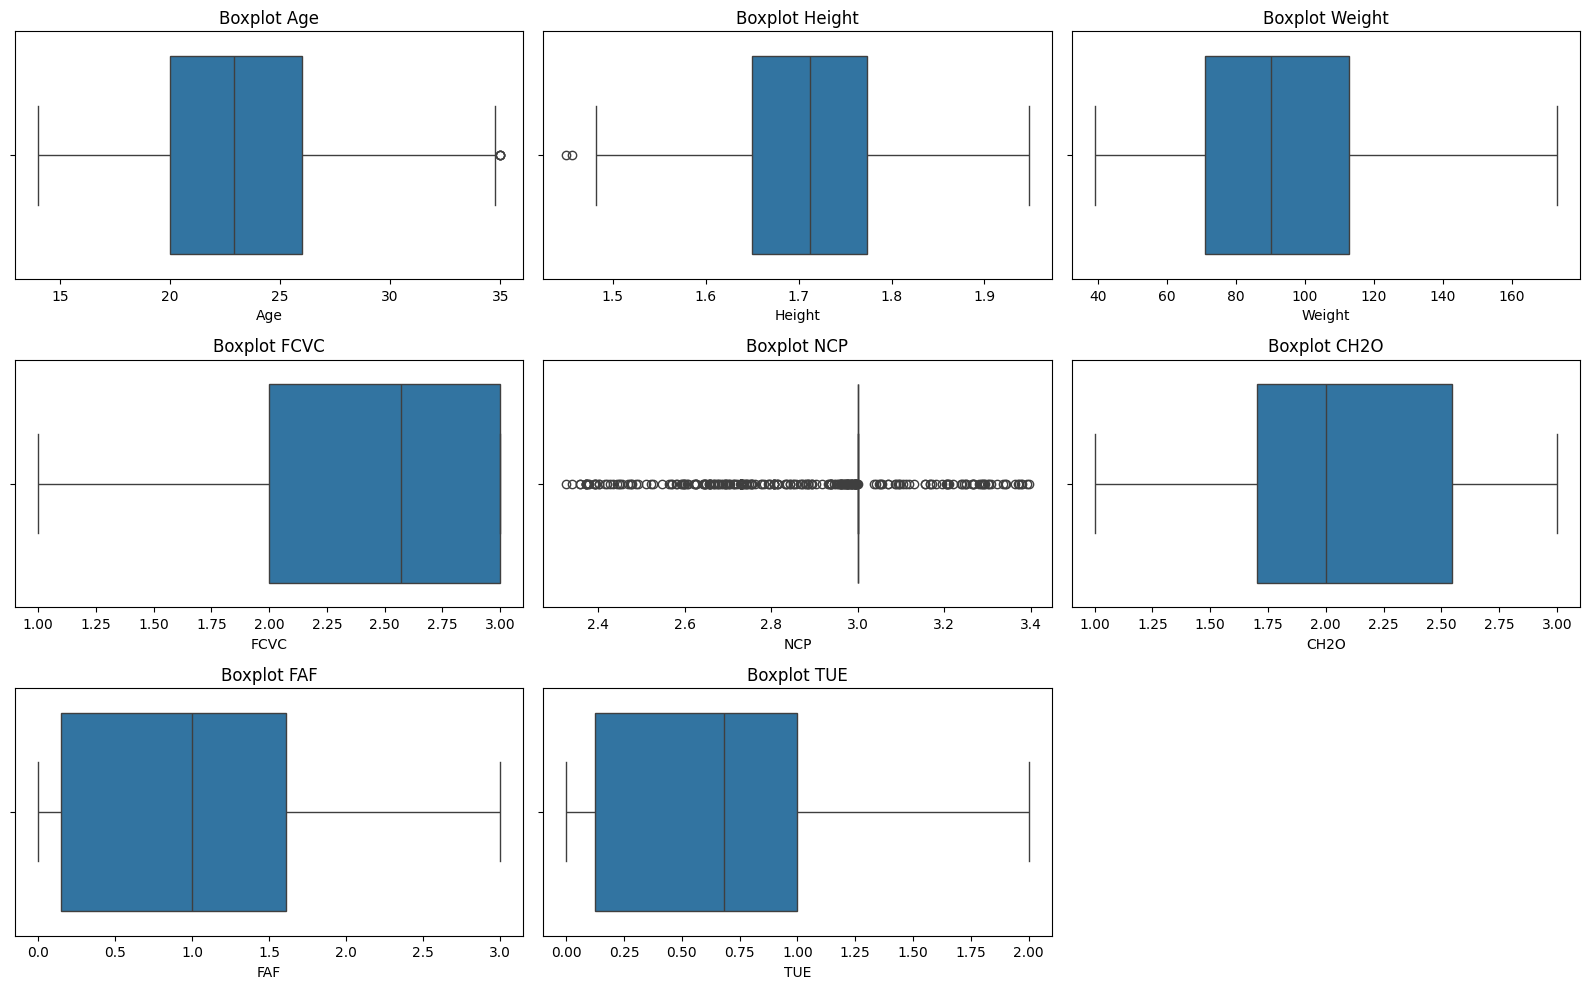

In [18]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

Visualisasi Outlier Setelah Penanganan dengan IQR:

Untuk mengevaluasi hasil dari proses pembersihan outlier menggunakan metode Interquartile Range (IQR), boxplot digunakan untuk setiap kolom numerik. Boxplot memberikan gambaran visual tentang distribusi data dan deteksi outlier.

Observasi:

1.Sebagian besar outlier berhasil dihilangkan dari kolom-kolom numerik seperti Height, Weight, FAF, dan TUE. Hal ini terlihat dari tidak adanya titik di luar whisker pada boxplot.

2.Beberapa kolom seperti NCP masih memperlihatkan visual noise meskipun tidak tampak nilai ekstrim secara ekstrem. Ini mungkin disebabkan oleh tingginya frekuensi nilai tertentu, bukan karena outlier.

3.Kolom lain seperti Age, CH2O, FCVC, dan FAF menunjukkan distribusi yang lebih bersih dan simetris, menandakan keberhasilan proses IQR dalam menghilangkan nilai ekstrem.

✅ Kesimpulan:

1.Metode IQR efektif dalam membersihkan nilai-nilai ekstrem dari data numerik tanpa mengubah struktur utama distribusi data.

2.Dataset menjadi lebih stabil untuk proses pelatihan model machine learning, mengurangi risiko overfitting akibat pengaruh outlier.

Tahapan selanjutnya adalah encoding, normalisasi, atau pemodelan.

# ENCODING

In [19]:
multi_cat_cols = ['Gender', 'CAEC', 'CALC', 'MTRANS']
binary_cols = [col for col in cat_cols if col not in multi_cat_cols]

encoders = {}
for col in multi_cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

for col in binary_cols:
    df[col] = LabelEncoder().fit_transform(df[col])  # not saved, assumed binary 0/1

In [20]:
# Encode target
target_le = LabelEncoder()
df['NObeyesdad'] = target_le.fit_transform(df['NObeyesdad'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1332 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             1332 non-null   float64
 1   Gender                          1332 non-null   int64  
 2   Height                          1332 non-null   float64
 3   Weight                          1332 non-null   float64
 4   CALC                            1332 non-null   int64  
 5   FAVC                            1332 non-null   int64  
 6   FCVC                            1332 non-null   float64
 7   NCP                             1332 non-null   float64
 8   SCC                             1332 non-null   int64  
 9   SMOKE                           1332 non-null   int64  
 10  CH2O                            1332 non-null   float64
 11  family_history_with_overweight  1332 non-null   int64  
 12  FAF                             1332 no

#Label Encoding pada Kolom Kategori
---

Dalam proses pembelajaran mesin, model tidak dapat memproses data dalam format teks atau kategori langsung. Oleh karena itu, kolom-kolom bertipe kategori perlu dikonversi menjadi representasi numerik menggunakan teknik encoding.

Langkah-langkah yang dilakukan:

1.Label Encoding pada kolom kategori:
Semua kolom bertipe objek (kategori) selain kolom target (NObeyesdad) dikonversi menjadi angka menggunakan LabelEncoder dari scikit-learn. Nilai kategori unik di setiap kolom diberi label numerik yang sesuai, dimulai dari nol.

2.Penyimpanan encoder untuk tiap kolom:

Untuk memastikan proses encoding dapat direproduksi atau dibalik (misalnya saat prediksi model), setiap objek LabelEncoder disimpan dalam dictionary label_encoders, dengan nama kolom sebagai kunci.

3.Encoding kolom target (NObeyesdad):

Kolom target juga di-encode menggunakan LabelEncoder yang terpisah (target_le) untuk keperluan klasifikasi. Ini penting untuk memastikan model dapat membaca label target sebagai nilai numerik.

Hasil Akhir:

Semua kolom kategori kini dalam bentuk numerik.

Proses encoding bersifat konsisten dan dapat di-decode kembali ke bentuk semula jika diperlukan.

Dataset kini sepenuhnya dalam format numerik dan siap untuk proses pelatihan model.

##Split Data, SMOTE, Standarisasi, dan Visualisasi Distribusi Kelas


>> Distribusi Kelas sebelum SMOTE(NObeyesdad):
NObeyesdad
4    314
3    205
2    190
1    188
6    160
5    144
0    131
Name: count, dtype: int64

>> Distribusi Kelas setelah SMOTE(NObeyesdad):
NObeyesdad
4    314
3    205
2    190
1    188
6    160
5    144
0    131
Name: count, dtype: int64


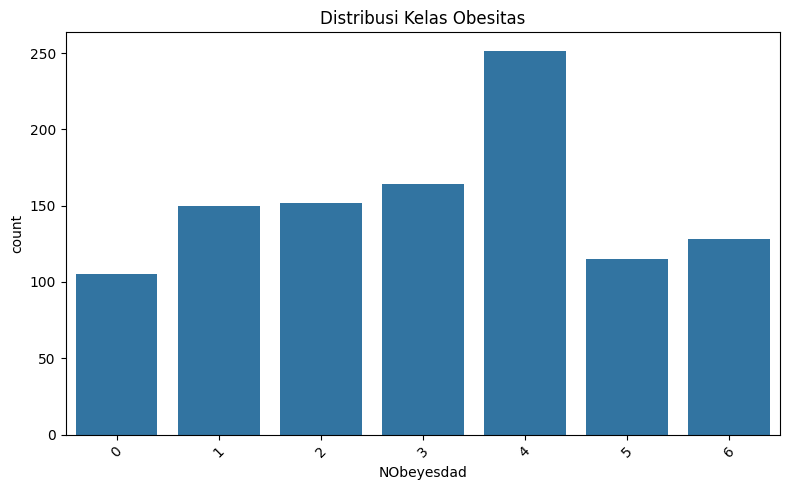

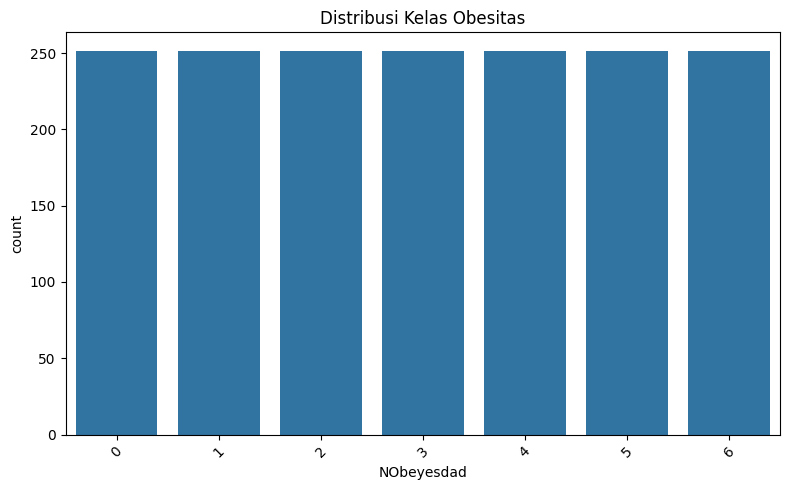

In [22]:
from sklearn.model_selection import train_test_split
# ===== Split Data 80:20 sebelum SMOTE =====
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# =====  SMOTE hanya pada data train =====
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# ===== Standarisasi hanya pada data train =====
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# ===== Visualisasi distribusi setelah SMOTE =====
print("\n>> Distribusi Kelas sebelum SMOTE(NObeyesdad):")
print(df['NObeyesdad'].value_counts())

plt.figure(figsize=(8, 5))
sns.countplot(x=y_train, data=df)
plt.title('Distribusi Kelas Obesitas')
plt.xticks(rotation=45)
plt.tight_layout()





print("\n>> Distribusi Kelas setelah SMOTE(NObeyesdad):")
print(df['NObeyesdad'].value_counts())

plt.figure(figsize=(8, 5))
sns.countplot(x=y_train_resampled, data=df)
plt.title('Distribusi Kelas Obesitas')
plt.xticks(rotation=45)
plt.tight_layout()


Setelah data selesai dibersihkan dan dikonversi ke bentuk numerik, langkah selanjutnya adalah menyiapkan data untuk proses pelatihan model.
Tahap ini mencakup proses pemisahan data, penyeimbangan kelas, normalisasi, dan visualisasi distribusi data.

Langkah-langkah yang dilakukan:

1. Split Data (80:20) Sebelum SMOTE
  Dataset dibagi menjadi dua bagian: data latih (training set) sebesar 80% dan data uji (test set) sebesar 20%.

  Digunakan parameter stratify=y agar distribusi kelas target tetap seimbang di kedua subset.

2. Penanganan Ketidakseimbangan Data Menggunakan SMOTE

  Diterapkan teknik Synthetic Minority Over-sampling Technique (SMOTE) pada data latih (X_train, y_train) saja.

  SMOTE membuat data sintetis untuk kelas minoritas sehingga distribusi kelas menjadi seimbang, tanpa mengubah data uji (X_test).

3. Standarisasi Fitur

  Dilakukan standardization menggunakan StandardScaler dari scikit-learn.

  Proses fit-transform hanya dilakukan pada data latih hasil SMOTE, sedangkan data uji hanya transform untuk menghindari kebocoran data.

4. Visualisasi Distribusi Kelas Setelah SMOTE

  Dilakukan visualisasi distribusi label target pada data latih setelah SMOTE menggunakan countplot.

  Tujuannya adalah memverifikasi bahwa distribusi kelas telah seimbang secara visual.

#Hasil Akhir:
1.Data telah dibagi dengan proporsi 80:20 secara stratified.

2.Distribusi kelas pada data latih telah seimbang berkat SMOTE.

3.Semua fitur telah dinormalisasi agar memiliki skala yang seragam.

4.Dataset siap digunakan untuk pelatihan model klasifikasi secara adil dan optimal.

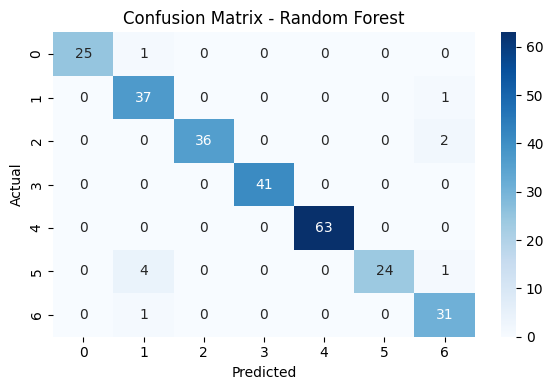

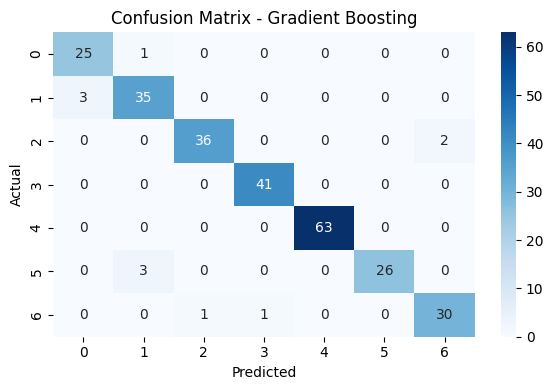

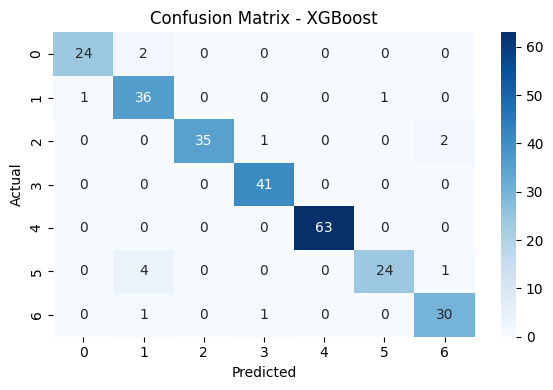

<Figure size 1000x600 with 0 Axes>

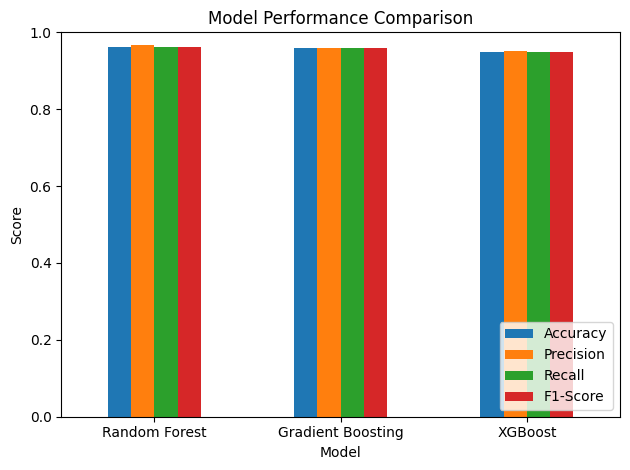

In [23]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Train models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })

    # Confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Plot comparison
plt.figure(figsize=(10, 6))
results_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(kind='bar')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [24]:
print(results_df)


               Model  Accuracy  Precision    Recall  F1-Score
0      Random Forest  0.962547   0.966444  0.962547  0.962754
1  Gradient Boosting  0.958801   0.959976  0.958801  0.958890
2            XGBoost  0.947566   0.950554  0.947566  0.947666


#Kesimpulan Hasil Pelatihan Model :

1. Tiga model klasifikasi telah dilatih dan dievaluasi menggunakan metrik Accuracy, Precision, Recall, dan F1-Score. Hasil evaluasi menunjukkan bahwa:

2. Random Forest memberikan performa terbaik dengan akurasi tertinggi sebesar 96.25%, serta nilai precision, recall, dan F1-score yang juga sangat baik dan seimbang. Hal ini menunjukkan bahwa model mampu mengklasifikasikan data dengan akurasi tinggi dan konsistensi dalam semua kelas.

3. Gradient Boosting menempati posisi kedua dengan akurasi 95.88%, hanya sedikit di bawah Random Forest. Meskipun sedikit lebih rendah, model ini tetap menunjukkan kinerja yang kuat dan stabil.

4. XGBoost menunjukkan performa yang baik dengan akurasi 94.75%, namun sedikit tertinggal dibandingkan dua model lainnya. Meski demikian, nilai precision dan recall masih tergolong tinggi dan dapat diandalkan.



Tuning Random Forest...
Tuning Gradient Boosting...
Tuning XGBoost...


<Figure size 1000x600 with 0 Axes>

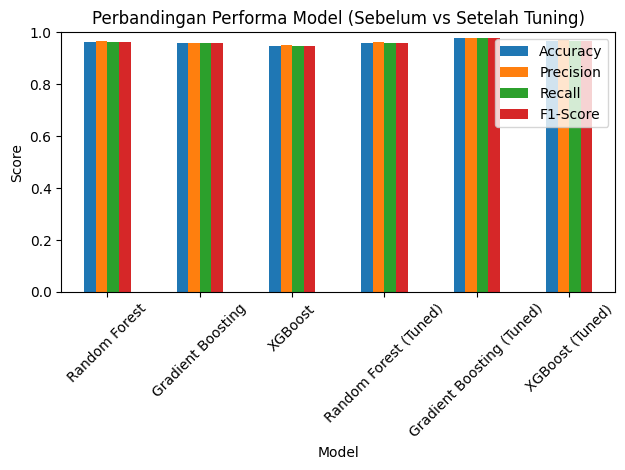

In [25]:
from sklearn.model_selection import RandomizedSearchCV
import warnings
import os
warnings.filterwarnings("ignore")

# Define parameter grids
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [3, 5],
        'subsample': [0.8, 1.0]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    }
}

# Re-initialize base models
base_models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}
# Directory
os.makedirs('models', exist_ok=True)

best_models = {}
tuned_results = []

# Perform tuning
for name, model in base_models.items():
    print(f"Tuning {name}...")
    search = RandomizedSearchCV(model, param_distributions=param_grids[name],
                                n_iter=10, cv=3, scoring='accuracy',
                                n_jobs=-1, random_state=42)
    search.fit(X_train_scaled, y_train_resampled)

    best_model = search.best_estimator_
    best_models[name] = best_model  # Save the best model

    # Evaluate on test data
    y_pred = best_model.predict(X_test_scaled)
    tuned_results.append({
        'Model': f"{name} (Tuned)",
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    })


# Gabungkan hasil sebelum dan sesudah tuning
all_results_df = pd.concat([
    pd.DataFrame(results),
    pd.DataFrame(tuned_results)
], ignore_index=True)

# Visualisasi perbandingan
plt.figure(figsize=(10, 6))
all_results_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(kind='bar')
plt.title("Perbandingan Performa Model (Sebelum vs Setelah Tuning)")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [26]:
print(all_results_df)


                       Model  Accuracy  Precision    Recall  F1-Score
0              Random Forest  0.962547   0.966444  0.962547  0.962754
1          Gradient Boosting  0.958801   0.959976  0.958801  0.958890
2                    XGBoost  0.947566   0.950554  0.947566  0.947666
3      Random Forest (Tuned)  0.958801   0.962195  0.958801  0.958956
4  Gradient Boosting (Tuned)  0.977528   0.978207  0.977528  0.977626
5            XGBoost (Tuned)  0.966292   0.968845  0.966292  0.966434


In [27]:
import joblib
os.makedirs("models", exist_ok=True)
joblib.dump(best_models['XGBoost'], "models/xgb_tuned.pkl")
joblib.dump(best_models['Gradient Boosting'], "models/gb_tuned.pkl")
joblib.dump(best_models['Random Forest'], "models/rf_tuned.pkl")
joblib.dump(scaler, "models/scaler.pkl")
joblib.dump(target_le, "models/label_encoder.pkl")
joblib.dump(encoders, "models/multi_label_encoders.pkl")
joblib.dump(X.columns.tolist(), "models/feature_columns.pkl")


['models/feature_columns.pkl']

In [28]:
import os
from google.colab import files

# Buat file ZIP dari isi folder models
!zip -r /content/models.zip /content/models

# Download file ZIP
files.download('/content/models.zip')

updating: content/models/ (stored 0%)
updating: content/models/scaler.pkl (deflated 27%)
updating: content/models/xgb_tuned.pkl (deflated 77%)
updating: content/models/feature_columns.pkl (deflated 20%)
updating: content/models/rf_tuned.pkl (deflated 83%)
updating: content/models/label_encoder.pkl (deflated 39%)
updating: content/models/gb_tuned.pkl (deflated 72%)
  adding: content/models/multi_label_encoders.pkl (deflated 60%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
df.nunique()

,0
Age,867
Gender,2
Height,1024
Weight,1018
CALC,3
FAVC,2
FCVC,466
NCP,240
SCC,2
SMOKE,2


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1332 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             1332 non-null   float64
 1   Gender                          1332 non-null   int64  
 2   Height                          1332 non-null   float64
 3   Weight                          1332 non-null   float64
 4   CALC                            1332 non-null   int64  
 5   FAVC                            1332 non-null   int64  
 6   FCVC                            1332 non-null   float64
 7   NCP                             1332 non-null   float64
 8   SCC                             1332 non-null   int64  
 9   SMOKE                           1332 non-null   int64  
 10  CH2O                            1332 non-null   float64
 11  family_history_with_overweight  1332 non-null   int64  
 12  FAF                             1332 no